In [173]:
# !pip install pandas matplotlib numpy seaborn

In [174]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.stats import chi2_contingency

Exercicio seção 1

Tabela de fisioterapia

In [175]:
df_fisio = pd.DataFrame({
    "Paciente": list(range(1, 16)),
    "Fisioterapia": [7, 8, 5, 6, 4, 5, 7, 7, 6, 8, 6, 5, 5, 4, 5],
    "Sequelas": ["S", "S", "N", "N", "N", "S", "S", "N", "N", "S", "S", "N", "S", "N", "N"],
    "Cirurgia": ["A", "M", "A", "M", "M", "B", "A", "M", "B", "M", "B", "B", "M", "M", "A"]
})
display(df_fisio)

,Paciente,Fisioterapia,Sequelas,Cirurgia
0,1,7,S,A
1,2,8,S,M
2,3,5,N,A
3,4,6,N,M
4,5,4,N,M
5,6,5,S,B
6,7,7,S,A
7,8,7,N,M
8,9,6,N,B
9,10,8,S,M


Faça um gráfico de ramos-e-folhas para a variável \enquote{Fisioterapia}.

In [176]:
display(df_fisio["Fisioterapia"].value_counts().sort_index())

Fisioterapia
4    2
5    5
6    3
7    3
8    2
Name: count, dtype: int64

Verifique se existe relação entre pacientes que fizeram menos de 6 sessões de fisioterapia e não ficaram com sequelas. Elabore uma tabela de contingência.

In [177]:
df_fisio["Menos de 6"] = df_fisio["Fisioterapia"] < 6
pd.crosstab(df_fisio["Menos de 6"], df_fisio["Sequelas"],margins=True)

Sequelas,N,S,All
Menos de 6,,,
False,3,5,8
True,5,2,7
All,8,7,15


Usando as variáveis Sequelas e Cirurgia, construa um gráfico de barras e um gráfico de setores.

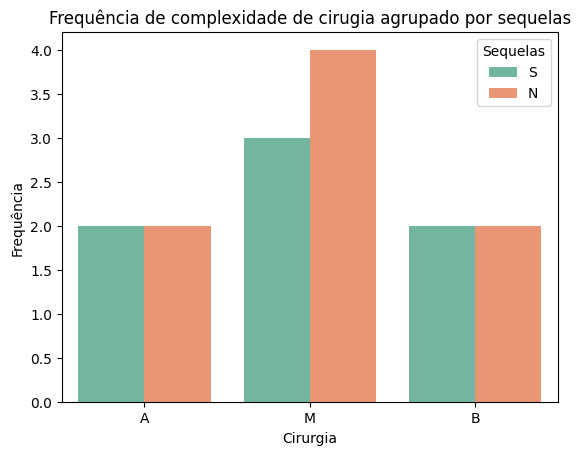

In [178]:
cross_tab = pd.crosstab(df_fisio["Cirurgia"], df_fisio["Sequelas"])
sns.countplot(data=df_fisio, x="Cirurgia", hue="Sequelas", palette="Set2")
plt.ylabel("Frequência")
plt.xlabel("Cirurgia")
plt.title("Frequência de complexidade de cirugia agrupado por sequelas")
plt.savefig("FrequenciaCirurgiaSequela.pdf",bbox_inches='tight')

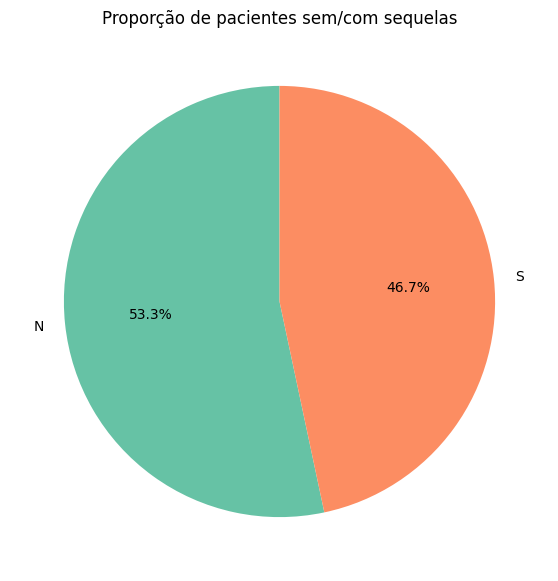

In [179]:
# Gráfico de Setores (Pizza) com Seaborn + Matplotlib
sequelas_counts = df_fisio["Sequelas"].value_counts()

# Plotando a pizza
plt.figure(figsize=(7, 7))
plt.pie(sequelas_counts, labels=sequelas_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(sequelas_counts)))
plt.title("Proporção de pacientes sem/com sequelas")
plt.ylabel("")  # Remove o label y
plt.savefig("ProporcaoPacienteSemComSequela.pdf",bbox_inches='tight')
plt.show()

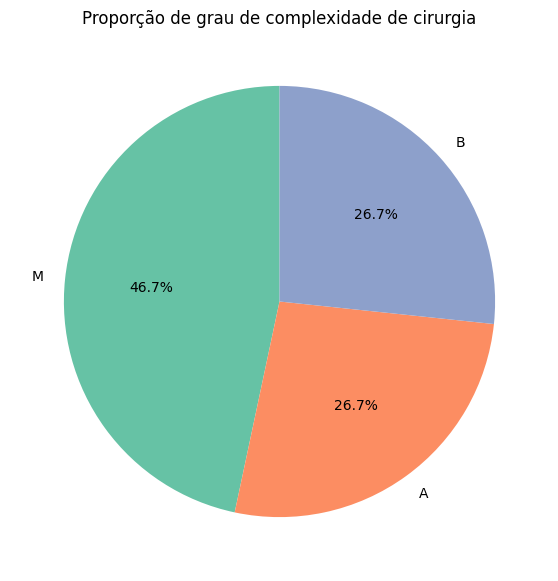

In [180]:
# Gráfico de Setores (Pizza) com Seaborn + Matplotlib
sequelas_counts = df_fisio["Cirurgia"].value_counts()

# Plotando a pizza
plt.figure(figsize=(7, 7))
plt.pie(sequelas_counts, labels=sequelas_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(sequelas_counts)))
plt.title("Proporção de grau de complexidade de cirurgia")
plt.ylabel("")  # Remove o label y
plt.savefig("ProporcaoGrauComplexidadeCirurgia.pdf",bbox_inches='tight')
plt.show()

Faça um boxplot para a variável Fisioterapia, considerando apenas pacientes com sequelas. Compare com o grupo sem sequelas.

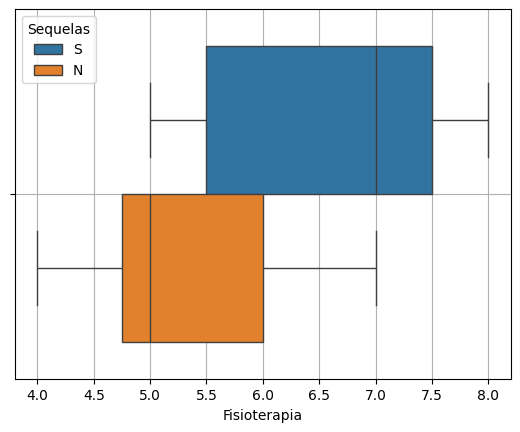

In [181]:
sns.boxplot(data=df_fisio,x='Fisioterapia',hue="Sequelas")
plt.grid()
plt.savefig("Boxplot.pdf",bbox_inches='tight')
plt.show()

Verifique se existe relação entre pacientes que fizeram menos de 6 sessões de fisioterapia e não ficaram com sequelas. Elabore uma tabela de contingência.

In [182]:
df_fisio["Menos_de_6"] = df_fisio["Fisioterapia"] < 6
contingencia_6  = pd.crosstab(df_fisio["Menos_de_6"], df_fisio["Sequelas"],margins=True)
display(contingencia_6)
chi2, p, dof, expected = chi2_contingency(contingencia_6)
print(f"\nValor do Qui-quadrado: {chi2:.4f}")


Sequelas,N,S,All
Menos_de_6,,,
False,3,5,8
True,5,2,7
All,8,7,15



Valor do Qui-quadrado: 1.7267


Elabore uma tabela de contingência relacionando o grau de complexidade da cirurgia com a variável Sequelas.

In [183]:
contingencia  = pd.crosstab(df_fisio["Cirurgia"], df_fisio["Sequelas"],margins=True)
display(contingencia)

Sequelas,N,S,All
Cirurgia,,,
A,2,2,4
B,2,2,4
M,4,3,7
All,8,7,15


In [184]:
df = pd.read_csv("https://drive.google.com/uc?id=19qbY3djYikS-okhQVPFDR1nIi6KTuv8i")

(a) Com base nas informações do arquivo, construa um novo banco de dados adicio-
nando 6 indivíduos escolhidos ao acaso. Use set.seed(numero_email) e imprima
os valores sorteados.

In [185]:
numero_email = 48
df = df.sample(n=6,random_state=numero_email)
display(df.head(6))


,Pac_No,Idade,Diag,Recup,Tratam,Coag
22,23,75,30,22,III,sim
11,20,24,3,1,II,nao
3,7,15,53,46,I,sim
1,4,15,52,45,I,nao
15,18,31,9,3,II,sim
10,16,40,20,11,III,sim


(b) No computador, crie uma nova planilha veneno123 com os dados apresentados e
salve em CSV.

In [186]:
df.to_csv("veneno123.csv",index=False)

(c) Considerando essa nova planilha:
i. Classifique cada uma das variáveis.

In [187]:
for i in df.columns:
    print(i)

Pac_No
Idade
Diag
Recup
Tratam
Coag


ii. Construa uma tabela de distribuição de frequência para a variável Diag, usando
k classes pelo método de Sturges.

Amplitude total: 45
H: 15
Bins: [1, 16, 31, 46]
Frequencia: Recup
[1, 16)     3
[16, 31)    1
[31, 46)    1
Name: count, dtype: int64
  Intervalo  Frequência
0   [1, 16)           3
1  [16, 31)           1
2  [31, 46)           1


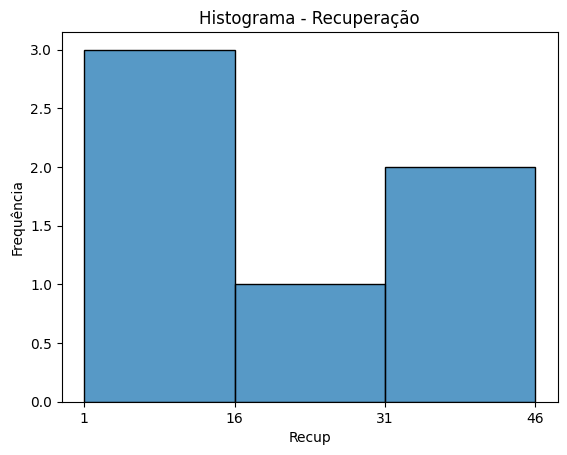

In [188]:
# 1. Número de classes (Sturges), nao possui implementacao em python
n = len(df["Recup"])
k = int(1 + 3.3219 * math.log10(n))

# 2. Amplitude total
amplitude_total = df["Recup"].max() - df["Recup"].min()
print(f"Amplitude total: {amplitude_total}")

# 3. Amplitude de cada classe
h = math.ceil(amplitude_total / k)
print(f"H: {h}")

# 4. Criar os intervalos de classe
bins = list(range(df["Recup"].min(), df["Recup"].max() + h, h))
print(f"Bins: {bins}")

# 5. Frequência
frequencia = pd.cut(df["Recup"], bins=bins, right=False).value_counts().sort_index()
print(f"Frequencia: {frequencia}")

# 6. Exibir tabela de frequência
freq_df = pd.DataFrame({
    "Intervalo": frequencia.index.astype(str),
    "Frequência": frequencia.values
})

print(freq_df)

sns.histplot(data=df,x="Recup", bins=bins)
plt.title("Histograma - Recuperação")
plt.xlabel("Recup")
plt.ylabel("Frequência")
plt.xticks(bins)
plt.savefig("RecuperacaoSturges.pdf",bbox_inches='tight')
plt.show()

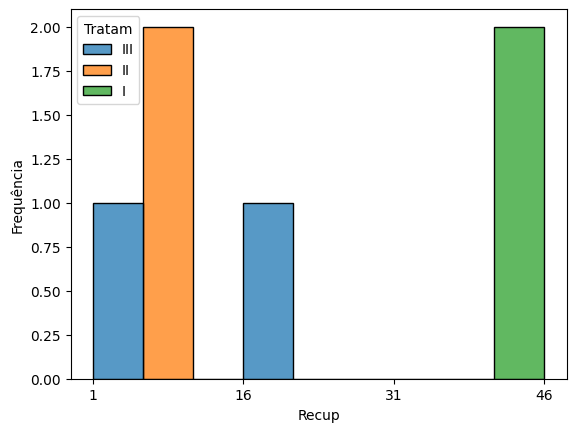

In [189]:
sns.histplot(data=df,x="Recup", bins=bins, edgecolor="black",hue="Tratam", multiple="dodge")
# plt.title("")
plt.xlabel("Recup")
plt.ylabel("Frequência")
plt.xticks(bins)
plt.savefig("FrequenciaCirurgiaSequela.pdf",bbox_inches='tight')
plt.show()

Através de representação gráfica adequada, compare a variável Recup entre os pacientes dentro dos três tratamentos. Você diria que as recuperações apresentam distribuição simétrica e mesocúrtica dentro dos três tratamentos (I, II, III)?

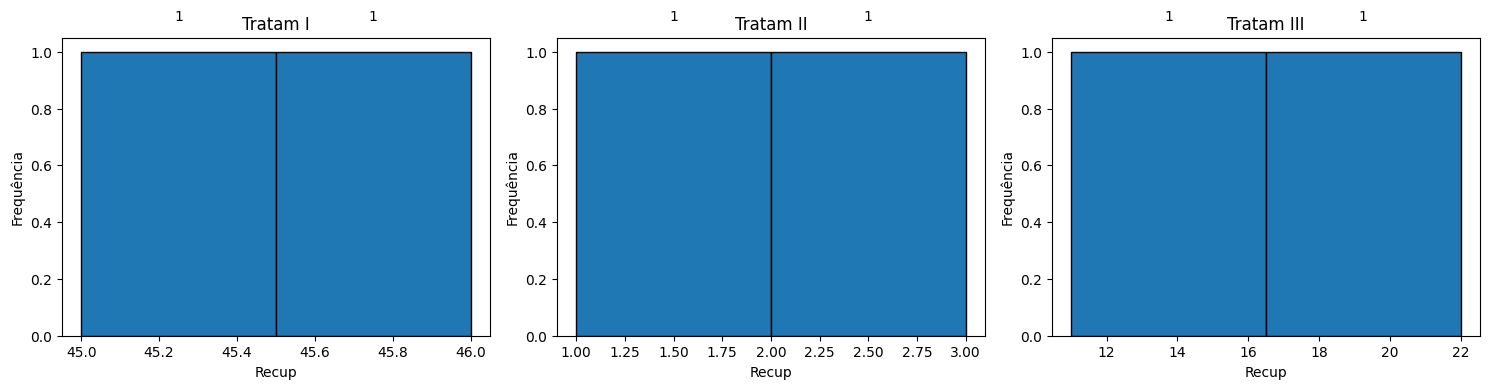

In [190]:
# Regra de Sturges para calcular número de bins
def sturges_rule(n):
    return int(np.ceil(1 + np.log2(n)))

# Criar subgrupos
recup1 = df[df["Tratam"] == "I"]["Recup"]
recup2 = df[df["Tratam"] == "II"]["Recup"]
recup3 = df[df["Tratam"] == "III"]["Recup"]

# Plotando os histogramas lado a lado
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (recup, title, ax) in enumerate(zip(
    [recup1, recup2, recup3],
    ["Tratam I", "Tratam II", "Tratam III"],
    axes
)):
    bins = sturges_rule(len(recup))
    counts, bins, patches = ax.hist(recup, bins=bins, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel("Recup")
    ax.set_ylabel("Frequência")

    # Adiciona os rótulos de frequência
    for count, patch in zip(counts, patches):
        ax.text(patch.get_x() + patch.get_width()/2, count + 0.1, int(count),
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig("FrequenciaTratamento.pdf",bbox_inches='tight')
plt.show()


Calcule os cinco números resumo e a média amostral para Recup em cada tratamento. Qual medida de posição é mais adequada? Justifique.

In [191]:
def kurt(p10,q1,q3,p90):
    return ((q3-q1)/2*(p90-p10))
recup1percentile = np.percentile(df[df["Tratam"] == "I"]["Recup"], [10,25,75,90])
recup2percentile = np.percentile(df[df["Tratam"] == "II"]["Recup"], [10,25,75,90])
recup3percentile = np.percentile(df[df["Tratam"] == "III"]["Recup"], [10,25,75,90])
print(kurt(recup1percentile[0],recup1percentile[1],recup1percentile[2],recup1percentile[3]))
print(kurt(recup2percentile[0],recup2percentile[1],recup2percentile[2],recup2percentile[3]))
print(kurt(recup3percentile[0],recup3percentile[1],recup3percentile[2],recup3percentile[3]))

0.1999999999999993
0.7999999999999999
24.199999999999996


No R: Mínimo, Primeiro quartil (Q1) — 25%, Mediana (Q2) — 50%, Terceiro quartil (Q3) — 75%, Máximo

In [192]:
recup1percentile = np.percentile(df[df["Tratam"] == "I"]["Recup"], [0, 25, 50, 75, 100])
recup2percentile = np.percentile(df[df["Tratam"] == "II"]["Recup"], [0, 25, 50, 75, 100])
recup3percentile = np.percentile(df[df["Tratam"] == "III"]["Recup"], [0, 25, 50, 75, 100])

print(f"Tratam == I:\n{recup1percentile}")
print(f"Tratam == I Media: {df[df["Tratam"] == "I"]["Recup"].mean()}\n")
print(f"Tratam == II:\n{recup2percentile}")
print(f"Tratam == II Media: {df[df["Tratam"] == "II"]["Recup"].mean()}\n")
print(f"Tratam == III:\n{recup3percentile}")
print(f"Tratam == III Media: {df[df["Tratam"] == "III"]["Recup"].mean()}\n")


Tratam == I:
[45.   45.25 45.5  45.75 46.  ]
Tratam == I Media: 45.5

Tratam == II:
[1.  1.5 2.  2.5 3. ]
Tratam == II Media: 2.0

Tratam == III:
[11.   13.75 16.5  19.25 22.  ]
Tratam == III Media: 16.5



Faça boxplots de Recup para cada tratamento e discuta a homogeneidade. Calcule variâncias, desvios-padrão e semi-amplitude interquartil ($\mathrm{IQR}/2$).

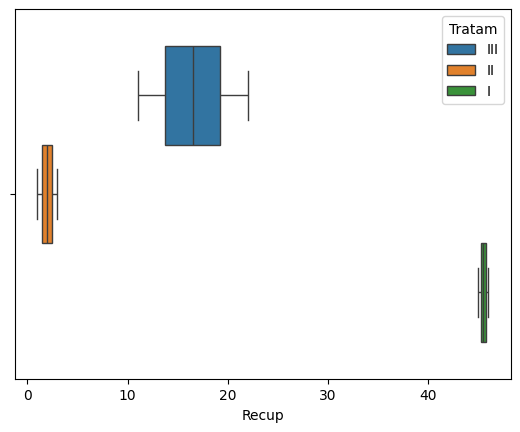


Desvio padrao Tratam I Recup
0.7071067811865476

Variancia Tratam I Recup
0.5

IQR/2 Tratam I Recup
0.25

Desvio padrao Tratam II Recup
1.4142135623730951

Variancia Tratam II Recup
2.0

IQR/2 Tratam II Recup
0.5

Desvio padrao Tratam III Recup
7.7781745930520225

Variancia Tratam III Recup
60.5

IQR/2 Tratam III Recup
2.75


<Figure size 640x480 with 0 Axes>

In [193]:
def iqr(q1,q3):
    return (q3-q1)/2
sns.boxplot(data=df,x="Recup",hue="Tratam")
plt.show()

for a in ["I","II","III"]:
    b = df[df["Tratam"] == a]["Recup"]
    print(f"\nDesvio padrao Tratam {a} Recup")
    print(np.std(b,ddof=1))
    print(f"\nVariancia Tratam {a} Recup")
    print(np.var(b,ddof=1))
    bq = np.percentile(b,[25,75])
    print(f"\nIQR/2 Tratam {a} Recup")
    print(iqr(bq[0],bq[1]))
    sns.boxplot(data=b)
    plt.savefig(f"Boxlplot {a}.pdf",bbox_inches='tight')
    plt.clf()


Ao invés de trabalhar com a variável Idade, crie uma nova variável denominada Etaria, assumindo “Jovem” se a Idade for menor ou igual a 25 anos e “Adulto”, caso contrário.

In [194]:
def classificar_etaria(idade):
    if idade <= 25:
        return 'Jovem'
    else:
        return 'Adulto'
df["Etaria"] = df['Idade'].apply(classificar_etaria)
display(df)

,Pac_No,Idade,Diag,Recup,Tratam,Coag,Etaria
22,23,75,30,22,III,sim,Adulto
11,20,24,3,1,II,nao,Jovem
3,7,15,53,46,I,sim,Jovem
1,4,15,52,45,I,nao,Jovem
15,18,31,9,3,II,sim,Adulto
10,16,40,20,11,III,sim,Adulto


Construa um box-plot para a variável Recup. Depois, construa os box-plots da variável Recup para cada grupo Etaria. Com base nas informações úteis do gráfico, você diria que, dependendo da faixa etária, o tempo de recuperação é diferente? Justifique sua resposta. Calcule a medida de cinco números para a variável Recup.

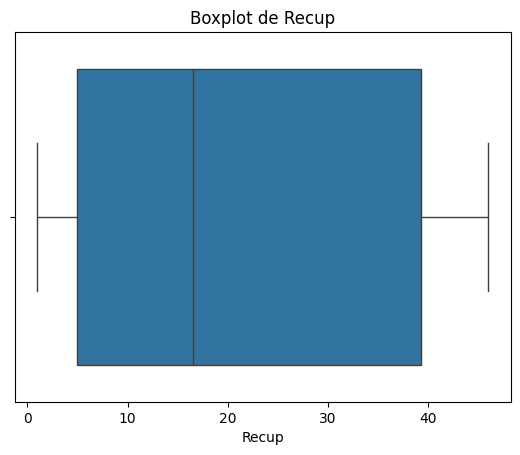

In [195]:
# Boxplot geral
sns.boxplot(x=df["Recup"])
plt.title("Boxplot de Recup")
plt.xlabel("Recup")
plt.savefig("BoxplotRecup.pdf",bbox_inches='tight')
plt.show()



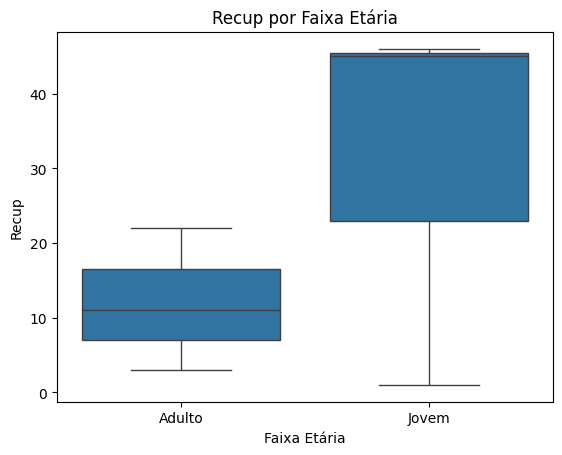

In [196]:
# Boxplot por faixa etária
sns.boxplot(x="Etaria", y="Recup", data=df)
plt.title("Recup por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Recup")
plt.savefig("BoxplotRecupFaixaEtaria.pdf",bbox_inches='tight')
plt.show()

In [197]:
# Medida dos cinco números
recup_fivenum = np.percentile(df["Recup"], [0, 25, 50, 75, 100])
print(f"Medida dos cinco números para Recup: {recup_fivenum}")

Medida dos cinco números para Recup: [ 1.    5.   16.5  39.25 46.  ]


Crie uma nova variável denominada Cura. A Cura será “Rápida” se Recup for menor ou igual a 10, será “Normal” entre $\geq 10$ e $< 40$ e será “Lenta” para Recup $\geq 40$.

In [198]:
def cura(recup):
    if recup<10:
        return "Rapida"
    if recup<40 and recup>=10:
        return "Normal"
    if recup>=40:
        return "Lenta"
df["Cura"] = df['Recup'].apply(cura)
display(df)

,Pac_No,Idade,Diag,Recup,Tratam,Coag,Etaria,Cura
22,23,75,30,22,III,sim,Adulto,Normal
11,20,24,3,1,II,nao,Jovem,Rapida
3,7,15,53,46,I,sim,Jovem,Lenta
1,4,15,52,45,I,nao,Jovem,Lenta
15,18,31,9,3,II,sim,Adulto,Rapida
10,16,40,20,11,III,sim,Adulto,Normal


Crie uma tabela de dupla entrada com Cura nas linhas e Tratam nas colunas. Com base na tabela, você diria que neste caso a rapidez da cura depende do tipo de tratamento considerado? Justifique.

In [199]:
pd.crosstab(df["Cura"],df["Tratam"],margins=True)

Tratam,I,II,III,All
Cura,,,,
Lenta,2,0,0,2
Normal,0,0,2,2
Rapida,0,2,0,2
All,2,2,2,6


Verifique, graficamente, se pacientes em cada uma das categorias de Cura apresentam diferenças no que se refere ao tempo entre o contato com o inseto e a administração do tratamento (I, II, III).

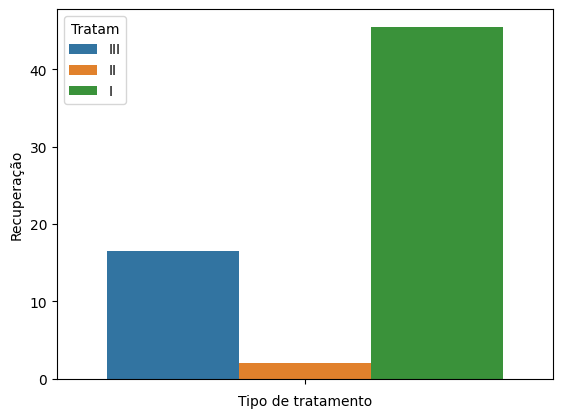

In [200]:
sns.barplot(data=df,y="Recup",hue="Tratam",errorbar=None)

plt.xlabel("Tipo de tratamento")
plt.ylabel("Recuperação")
plt.savefig("BarplotRecupTratam.pdf",bbox_inches='tight')
plt.show()